<a href="https://colab.research.google.com/github/d9249/DACON/blob/main/Validation_split_0.000_1_DenseNet121(public-0.92647%2C%20private-0.89618).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Aug 22 15:32:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    24W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/test.csv')

In [4]:
!mkdir images_train
!mkdir images_train/0
!mkdir images_train/1
!mkdir images_train/2
!mkdir images_train/3
!mkdir images_train/4
!mkdir images_train/5
!mkdir images_train/6
!mkdir images_train/7
!mkdir images_train/8
!mkdir images_train/9
!mkdir images_test

In [5]:
import cv2

for idx in range(len(train)) :
    img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
    digit = train.loc[idx, 'digit']
    cv2.imwrite(f'./images_train/{digit}/{train["id"][idx]}.png', img)

In [6]:
import cv2

for idx in range(len(test)) :
    img = test.loc[idx, '0':].values.reshape(28, 28).astype(int)
    cv2.imwrite(f'./images_test/{test["id"][idx]}.png', img)

In [7]:
import tensorflow as tf
DenseNet121_model = tf.keras.applications.DenseNet121(weights=None, include_top=True, input_shape=(224, 224, 1), classes=10)

In [8]:
from tensorflow.keras.optimizers import Adam
DenseNet121_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.002,epsilon=None), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                             rescale=1./255, 
                             validation_split=0,
                             rotation_range=10,
                             width_shift_range=0.1,
                             height_shift_range=0.1)

train_generator = datagen.flow_from_directory('./images_train', target_size=(224,224), color_mode='grayscale', class_mode='categorical', subset='training')
val_generator = datagen.flow_from_directory('./images_train', target_size=(224,224), color_mode='grayscale', class_mode='categorical', subset='validation')

Found 2048 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


In [10]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'/content/drive/MyDrive/DACON_CVLC/Checkpoint/Validation_split_0.000_1_DenseNet121.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [11]:
DenseNet121_model.fit_generator(train_generator, epochs=500, validation_data=val_generator, callbacks=[checkpoint])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
64/64 [==============================] - 37s 169ms/step - loss: 1.7403 - accuracy: 0.3833
Epoch 2/500
64/64 [==============================] - 11s 169ms/step - loss: 1.0827 - accuracy: 0.6353
Epoch 3/500
64/64 [==============================] - 11s 168ms/step - loss: 0.8827 - accuracy: 0.7012
Epoch 4/500
64/64 [==============================] - 11s 169ms/step - loss: 0.7181 - accuracy: 0.7612
Epoch 5/500
64/64 [==============================] - 11s 167ms/step - loss: 0.6713 - accuracy: 0.7666
Epoch 6/500
64/64 [==============================] - 11s 166ms/step - loss: 0.5679 - accuracy: 0.8115
Epoch 7/500
64/64 [==============================] - 11s 167ms/step - loss: 0.5049 - accuracy: 0.8276
Epoch 8/500
64/64 [==============================] - 11s 167ms/step - loss: 0.4905 - accuracy: 0.8354
Epoch 9/500
64/64 [==============================] - 11s 166ms/step - loss: 0.4428 - accuracy: 0.8501
Epoch 10/500
64/64 [==============================] - 11s 166ms/step - loss: 0.390

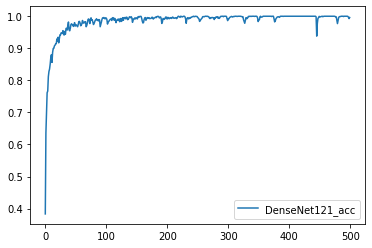

In [12]:
import matplotlib.pyplot as plt

plt.plot(DenseNet121_model.history.history["accuracy"], label='DenseNet121_acc')
# plt.plot(DenseNet121_model.history.history["val_accuracy"], label='DenseNet121_val')

plt.legend()
plt.show()

In [14]:
DenseNet121_model = tf.keras.models.load_model('/content/drive/MyDrive/DACON_CVLC/Checkpoint/Validation_split_0000_1_DenseNet121.h5', compile=False)

OSError: ignored

In [15]:
!mkdir images_test/none
!mv images_test/*.png images_test/none

In [16]:
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory('./images_test', target_size=(224,224), color_mode='grayscale', class_mode='categorical', shuffle=False)

Found 20480 images belonging to 1 classes.


In [17]:
DenseNet121_predict = DenseNet121_model.predict_generator(test_generator).argmax(axis=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [18]:
submission = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/submission.csv')
submission.head()

,id,digit
0,2049,0
1,2050,0
2,2051,0
3,2052,0
4,2053,0


In [19]:
import numpy as np
mylist = []

for i in range(len(submission)):
    name =  test_generator.filenames
    id = name[i].split('/')[1].rstrip('.').split('.')[0]
    mylist.append(id)

In [20]:
for i in range(len(submission)):
    submission["id"][i] = mylist[i]

In [21]:
submission["DenseNet121_predict"] = DenseNet121_predict

In [22]:
from collections import Counter

for i in range(len(submission)) :
    predicts = submission.loc[i, ['DenseNet121_predict']]
    submission.at[i, "digit"] = Counter(predicts).most_common(n=1)[0][0]

In [23]:
submission = submission[['id', 'digit']]
submission.head()

,id,digit
0,10000,4
1,10001,4
2,10002,6
3,10003,9
4,10004,5


In [24]:
from google.colab import files

submission.to_csv('/content/drive/MyDrive/DACON_CVLC/Submission/Validation_split_0.000_1_DenseNet121_model.csv', index=False)
files.download('/content/drive/MyDrive/DACON_CVLC/Submission/Validation_split_0.000_1_DenseNet121_model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>